In [1]:
#open new data dase file
import plotly
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
traid_data = pd.read_csv('/Users/papaskakun/Desktop/Project_traiding/Data/market_traiding.csv',
                          header=0, 
                         names = ['Date', 'Name',
                                  'Type', 'Open_price',
                                  'Value','Close price','Reasons', 'Step',
                                  'Step price', 'Delta','Total'],                       
                         sep = ';')
traid_data

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total
0,15.01.2022,BRH2022,лонг,"85,65",1,88,переложил позицию,"0,01","7,61","1788,24","101788,24"
1,15.01.2022,LKH2022,лонг,67491,1,65740,собственное решение,1,1,-1751,"100037,24"
2,15.01.2022,MXH2022,лонг,368075,1,351600,Не опытность,1,1,-16475,"83562,24"
3,19.01.2022,RIH2022,лонг,141730,1,141400,выбило по стопу,10,"15,3","-504,9","83057,34"
4,19.01.2022,GDH2022,лонг,1843,1,1838,выбило по стопу,1,"76,21","-381,05","82676,29"
...,...,...,...,...,...,...,...,...,...,...,...
410,24.11.2022,GD 12.22,шорт,"1751,3",1,"1741,5",hands,"0,1","6,17","604,56","158116,88"
411,24.11.2022,GD 12.22,шорт,1752,1,1748,hands,"0,1","6,17","246,76","158363,64"
412,28.11.2022,Spyf 12.22,шорт,"397,7",1,402,stop,"0,01","0,6","-258,04","158105,6"
413,29.11.2022,Spyf 12.22,шорт,"396,85",1,"400,2",stop,"0,01","0,6","-201,03","157904,57"


In [3]:
# replace ','
traid_data['Delta'] = traid_data['Delta'].str.replace(',', '.')
traid_data['Delta'] = traid_data['Delta'].astype('float')

In [4]:

traid_data['Total'] = traid_data['Total'].str.replace(',', '.')
traid_data['Total'] = traid_data['Total'].astype('float')

In [6]:
# display dinamic of balance
fig = px.line(
    traid_data,
    x='Date',
    y='Total',
    #color="continent",
    #line_group="country",
    #hover_name="country",
    #line_shape="spline",
    render_mode="svg")
fig.show();

In [9]:
 traid_data['Date'] = pd.to_datetime( traid_data['Date'])

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '15.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '19.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '20.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '21.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/

In [10]:
traid_data['MonthSale'] = traid_data['Date'].dt.month

In [11]:
# we find error, we make this analysis at 1 of Dec/ we dont traid in this month 
#
def get_errors (num):
    if num == 12:
        return 4
    else:
        return num
    
traid_data['MonthSale'] = traid_data['MonthSale'].apply(get_errors)  

display(traid_data['MonthSale'].value_counts())

1     118
2      62
7      47
4      41
6      37
11     36
8      27
9      24
3      15
10      5
5       3
Name: MonthSale, dtype: int64

In [12]:
help_chart = traid_data.groupby('MonthSale')['Value'].count()
display(help_chart)

MonthSale
1     118
2      62
3      15
4      41
5       3
6      37
7      47
8      27
9      24
10      5
11     36
Name: Value, dtype: int64

In [13]:
fig = px.histogram(help_chart,
                   x=help_chart.index,
                   y = ['Value'],
                   nbins=12,
                   title="Количесво взятых контрактов по месяцам",
                   #hover_data = ['Value']
                   #labels={'x':'Number of Month', 'y':'counts of Contracts'}
                  )
fig.update_layout(hovermode="x unified") # Указываем что подскзку показываем сразу для всех элементов 
                                         # в разрезе по оси X. По мне просто бомба для этого графика, 
                                         # особенно для 4 колонки, где непонятно, есть второй сегмент 
                                         # клиентов или нету
fig.show()

In [14]:
#func to find name of contract
import re 
def get_name(arg):
    #находим все слова по шаблону 
    candidates = re.findall(r'^\w+', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
        #очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('2022', '')
        #year = year.replace(')', '')
        return year
    else:
        #если год не указан, возвращаем None
        return None
    
#created new sign
traid_data['NameComtract'] = traid_data['Name'].apply(get_name)
display(traid_data['NameComtract'].loc[::10])

0       BRH
10      RIH
20      RIH
30      BRG
40      RIH
50      RIH
60      RIH
70      RIH
80      RIH
90      RIH
100     LKH
110     BRH
120     RIH
130     RIH
140     GDH
150     BRH
160     RIH
170     RIH
180     SIH
190     SIH
200     BRH
210     SFH
220     BRH
230     BRH
240     SIM
250     GDJ
260      BR
270      GD
280    RTSM
290      BR
300    RTSM
310      SI
320      SI
330    RTSM
340      GD
350      GD
360      GD
370      GD
380    RTSM
390    RTSM
400    RTSM
410      GD
Name: NameComtract, dtype: object

In [15]:
# func to improve names of contract

def change_rts(name):
    if name == 'RIH':
        return 'RTS'
    else:
        return name
    
def get_br_type(name):
    br_list = ['BRH','BRG','BRJ'] #create list of barel
   
    if name in br_list:
        # if it is oil
        res = 'BR'
        return res
    else:
        return name    

def get_si_type(name):
    si_list = ['SIH','SIM','SIH','si','Si'] #create list of si 
   
    if name in si_list:
        # if it is dollar
        res = 'SI'
        return res
    else:
        return name 
    
def get_gd_type(name):
    gd_list = ['GDH','GDJ'] #create list of gold #create list of gd 
   
    if name in gd_list:
        # if it is gold
        res = 'GD'
        return res
    else:
        return name 

def get_sf_type(name):
    sf_list = ['SFH','Spyf'] #create list of gold #create list of sf 
   
    if name in sf_list:
        # if it is SP500
        res = 'SF'
        return res
    else:
        return name 
    
traid_data['NameComtract'] = traid_data['NameComtract'].apply(change_rts)    
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_br_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_si_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_gd_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_sf_type)
display(traid_data['NameComtract'].loc[::10])

0        BR
10      RTS
20      RTS
30       BR
40      RTS
50      RTS
60      RTS
70      RTS
80      RTS
90      RTS
100     LKH
110      BR
120     RTS
130     RTS
140      GD
150      BR
160     RTS
170     RTS
180      SI
190      SI
200      BR
210      SF
220      BR
230      BR
240      SI
250      GD
260      BR
270      GD
280    RTSM
290      BR
300    RTSM
310      SI
320      SI
330    RTSM
340      GD
350      GD
360      GD
370      GD
380    RTSM
390    RTSM
400    RTSM
410      GD
Name: NameComtract, dtype: object

In [16]:
#check proportion of contract
traid_data['NameComtract'].value_counts(normalize = True)

BR      0.267640
RTS     0.201946
SI      0.182482
GD      0.138686
RTSM    0.109489
SF      0.065693
LKH     0.014599
GAZP    0.012165
MXH     0.002433
GZH     0.002433
NGJ     0.002433
Name: NameComtract, dtype: float64

In [26]:
# improve data only for corect vizuale / concatinate so small values and change type to 'other'
#
popular_con = traid_data['NameComtract'].value_counts().nlargest(7).index
con_for_chart = traid_data['NameComtract'].apply(lambda x: x if x in popular_con else 'other')

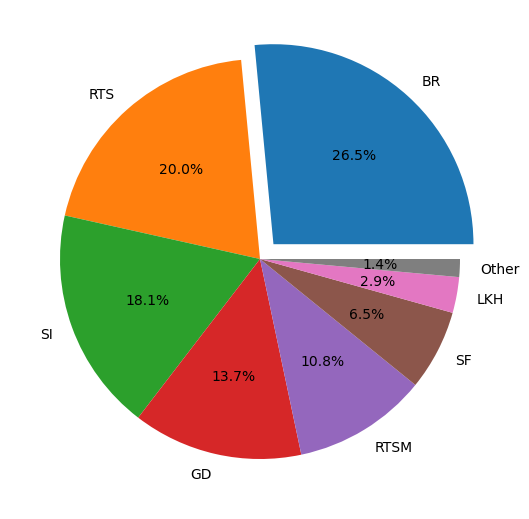

In [19]:
# create pie chart
import plotly
import matplotlib.pyplot as plt

# improve data only for corect vizuale\
popular_con = traid_data['NameComtract'].value_counts().nlargest(7).index
con_for_chart = traid_data['NameComtract'].apply(lambda x: x if x in popular_con else 'other')

#make chart
pie_chart = con_for_chart.value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['BR','RTS','SI','GD','RTSM','SF','LKH','Other'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0,0,0,0,0]
);

In [20]:
# check that info from types of contract direction
#
traid_data['Type'].value_counts(normalize = True)

шорт    0.585542
лонг    0.414458
Name: Type, dtype: float64

In [21]:
# group date  to create chart
bar_chart_types = traid_data.groupby(
    ['NameComtract','Type'],
    as_index=False
).count()[['NameComtract','Type','Value']]
display(bar_chart_types)

,NameComtract,Type,Value
0,BR,лонг,64
1,BR,шорт,46
2,GAZP,лонг,3
3,GAZP,шорт,2
4,GD,лонг,27
5,GD,шорт,30
6,GZH,лонг,1
7,LKH,лонг,3
8,LKH,шорт,3
9,MXH,лонг,1


In [22]:
# create chart to work
fig = px.bar(
    bar_chart_types,
    x = 'NameComtract',
    y = 'Value',
    color = 'Type',
    title="Отношение коротких и длинных позиций",
    text_auto='.2s'# print value on bar 
)
fig.update_layout(barmode='stack')
fig.show()

In [23]:
#acquaintance with data of reasons
traid_data['Reasons'].value_counts()

stop                               118
take                                57
Выбило по стопу                     48
закрыл вруную                       38
 Закрыл вручную                     35
hans                                33
закрыл в руччную                    22
hands                               21
тейк                                10
стоп                                 9
Stop                                 8
 Тейк                                7
выбило по стопу                      2
Дивергенция,ставка на повышение      1
Тейк                                 1
переложил на лонг                    1
собственное решение                  1
 Не опытность                        1
Просто повезло                       1
переложил позицию                    1
Name: Reasons, dtype: int64

In [24]:
# func to cleaning data of reasons
# func to improve names of contract
  
def get_stop(name):
    st_list = ['stop', 'Выбило по стопу','стоп','Stop','' ] #create list of stop closed
   
    if name in st_list:
        # if it is stop
        res = 'Stop'
        return res
    else:
        return name    

def get_by_hands(name):
    hn_list = ['закрыл вруную',' Закрыл вручную','hans',
               'закрыл в руччную','hands',  ] #create list of hands closed
   
    if name in hn_list:
        # if it is hands
        res = 'Hands'
        return res
    else:
        return name 
    
def get_take(name):
    tk_list = ['take','тейк',' Тейк',] #create list of take closed
   
    if name in tk_list:
        # if it is take
        res = 'Take'
        return res
    else:
        return name 

    
# CALL THIS FUNC LAST, THIS CHANGES MAST BE APPLY AFTER MAIN CLEANING
def get_other(name):
    all_list = ['Take','Hands','Stop'] #create list of main reasons
   
    if name in all_list:
        # if it is our certain values
        return name
    else:
        return 'Other'
    
traid_data['Reasons'] = traid_data['Reasons'].apply(get_stop)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_by_hands)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_take)

# call to last improve to change last trash on type 'other'
traid_data['Reasons'] = traid_data['Reasons'].apply(get_other)
display(traid_data['Reasons'].loc[::10])

0      Other
10      Stop
20      Stop
30     Hands
40      Stop
50     Hands
60      Stop
70      Stop
80     Hands
90      Stop
100     Stop
110     Take
120    Other
130     Take
140     Take
150     Stop
160    Hands
170    Hands
180     Take
190     Take
200    Hands
210    Hands
220     Stop
230    Hands
240    Hands
250     Stop
260     Stop
270    Hands
280     Stop
290     Stop
300     Take
310    Hands
320     Stop
330     Stop
340     Stop
350     Stop
360     Stop
370     Stop
380    Hands
390     Stop
400     Stop
410    Hands
Name: Reasons, dtype: object

In [25]:
# check result of improving
traid_data['Reasons'].value_counts(normalize = True)

Stop     0.440964
Hands    0.359036
Take     0.178313
Other    0.021687
Name: Reasons, dtype: float64

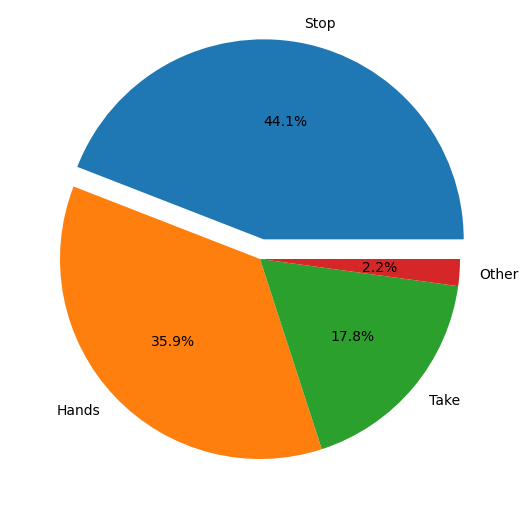

In [26]:
#create chart of reasons of closed
pie_chart = traid_data['Reasons'].value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['Stop','Hands','Take','Other'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0]
);

In [36]:
traid_data

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total,MonthSale,NameComtract
0,2022-01-15,BRH2022,лонг,"85,65",1,88,Other,"0,01","7,61",1788.24,101788.24,1,BR
1,2022-01-15,LKH2022,лонг,67491,1,65740,Other,1,1,-1751.00,100037.24,1,LKH
2,2022-01-15,MXH2022,лонг,368075,1,351600,Other,1,1,-16475.00,83562.24,1,MXH
3,2022-01-19,RIH2022,лонг,141730,1,141400,Other,10,"15,3",-504.90,83057.34,1,RTS
4,2022-01-19,GDH2022,лонг,1843,1,1838,Other,1,"76,21",-381.05,82676.29,1,GD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,2022-11-24,GD 12.22,шорт,"1751,3",1,"1741,5",Hands,"0,1","6,17",604.56,158116.88,11,GD
411,2022-11-24,GD 12.22,шорт,1752,1,1748,Hands,"0,1","6,17",246.76,158363.64,11,GD
412,2022-11-28,Spyf 12.22,шорт,"397,7",1,402,Stop,"0,01","0,6",-258.04,158105.60,11,SF
413,2022-11-29,Spyf 12.22,шорт,"396,85",1,"400,2",Stop,"0,01","0,6",-201.03,157904.57,11,SF


In [37]:
# reserch delta in persent 
#formul:
#c = x /100
#a = (x - y) / c 

def get_delta_persent(x,y):
    c = arg / 100
    res = float((x - y) / c)
    return round(res, 2)


traid_data

SyntaxError: invalid character '№' (U+2116) (3718049274.py, line 1)

In [ ]:
# find corelision type of contract with direction of enter / with delta 